# Bias in EuroSAT

The EuroSAT dataset is a land-cover satellite image classification use-case on 13 spectral bands consisting on 10 classes and containing 27000 labeled and geo-referenced examples. As we will be placing ourselves in the *fairness* frame of work, we will be simplyfying our problem to a Highway/River binary classification problem, where we also know that a small percentage of images (~3\% of the whole dataset) has a certain blue-veiled property. As we will prove later, this group of images constitutes a discriminated group in the sense of the equality of odds/errors.
To identify these images, we will transform the images to the HSV color-space, and use custom thresholds in the mean of each channel to flag each image as either discriminated (blue-veiled, S=0) or not (S=1). In particular, we fix this threshold at 0.35 for the saturation channel, 0.4 for the value, and verify that the hue's value is between 210 and 270. With this information, we can calculate some statistics about the dataset.

## Imports

In [1]:
# General Imports
import plotly.express as px

# Augmentare Imports
from utils import plot_wrong_pred, plot_bar_err_rate, plot_loss_acc_train,\
                plot_bar_acc_simu_simple, plot_err_rate_simu_simple,\
                plot_bar_acc_simu_double, plot_err_rate_simu_double,\
                plot_err_rate_test, plot_acc_test, plot_err_rate_test_double,\
                plot_heatmap_accuracy, plot_heatmap_err_rate,\
                average_seeds, get_acc_err_rate, get_dataframe

/home/vuong.nguyen/vuong/augmentare/dev_augmentare/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
save_path = "/home/vuong.nguyen/vuong/augmentare/Bias in EuroSAT/Exp/Output_Vgg16"

## Simulation with FDA

In [3]:
nbs_highway = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
nbs_river = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

In [4]:
path = "/home/vuong.nguyen/vuong/augmentare/Bias in EuroSAT/NST_output/FDA/Vgg16"
accuracy, error_rate = average_seeds(path=path, nb_seeds=10)

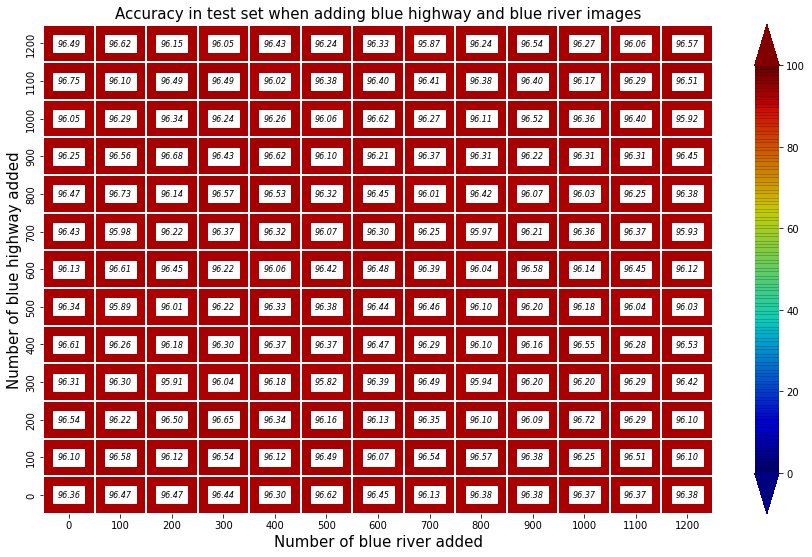

In [5]:
plot_heatmap_accuracy(accuracy, nbs_highway, nbs_river)

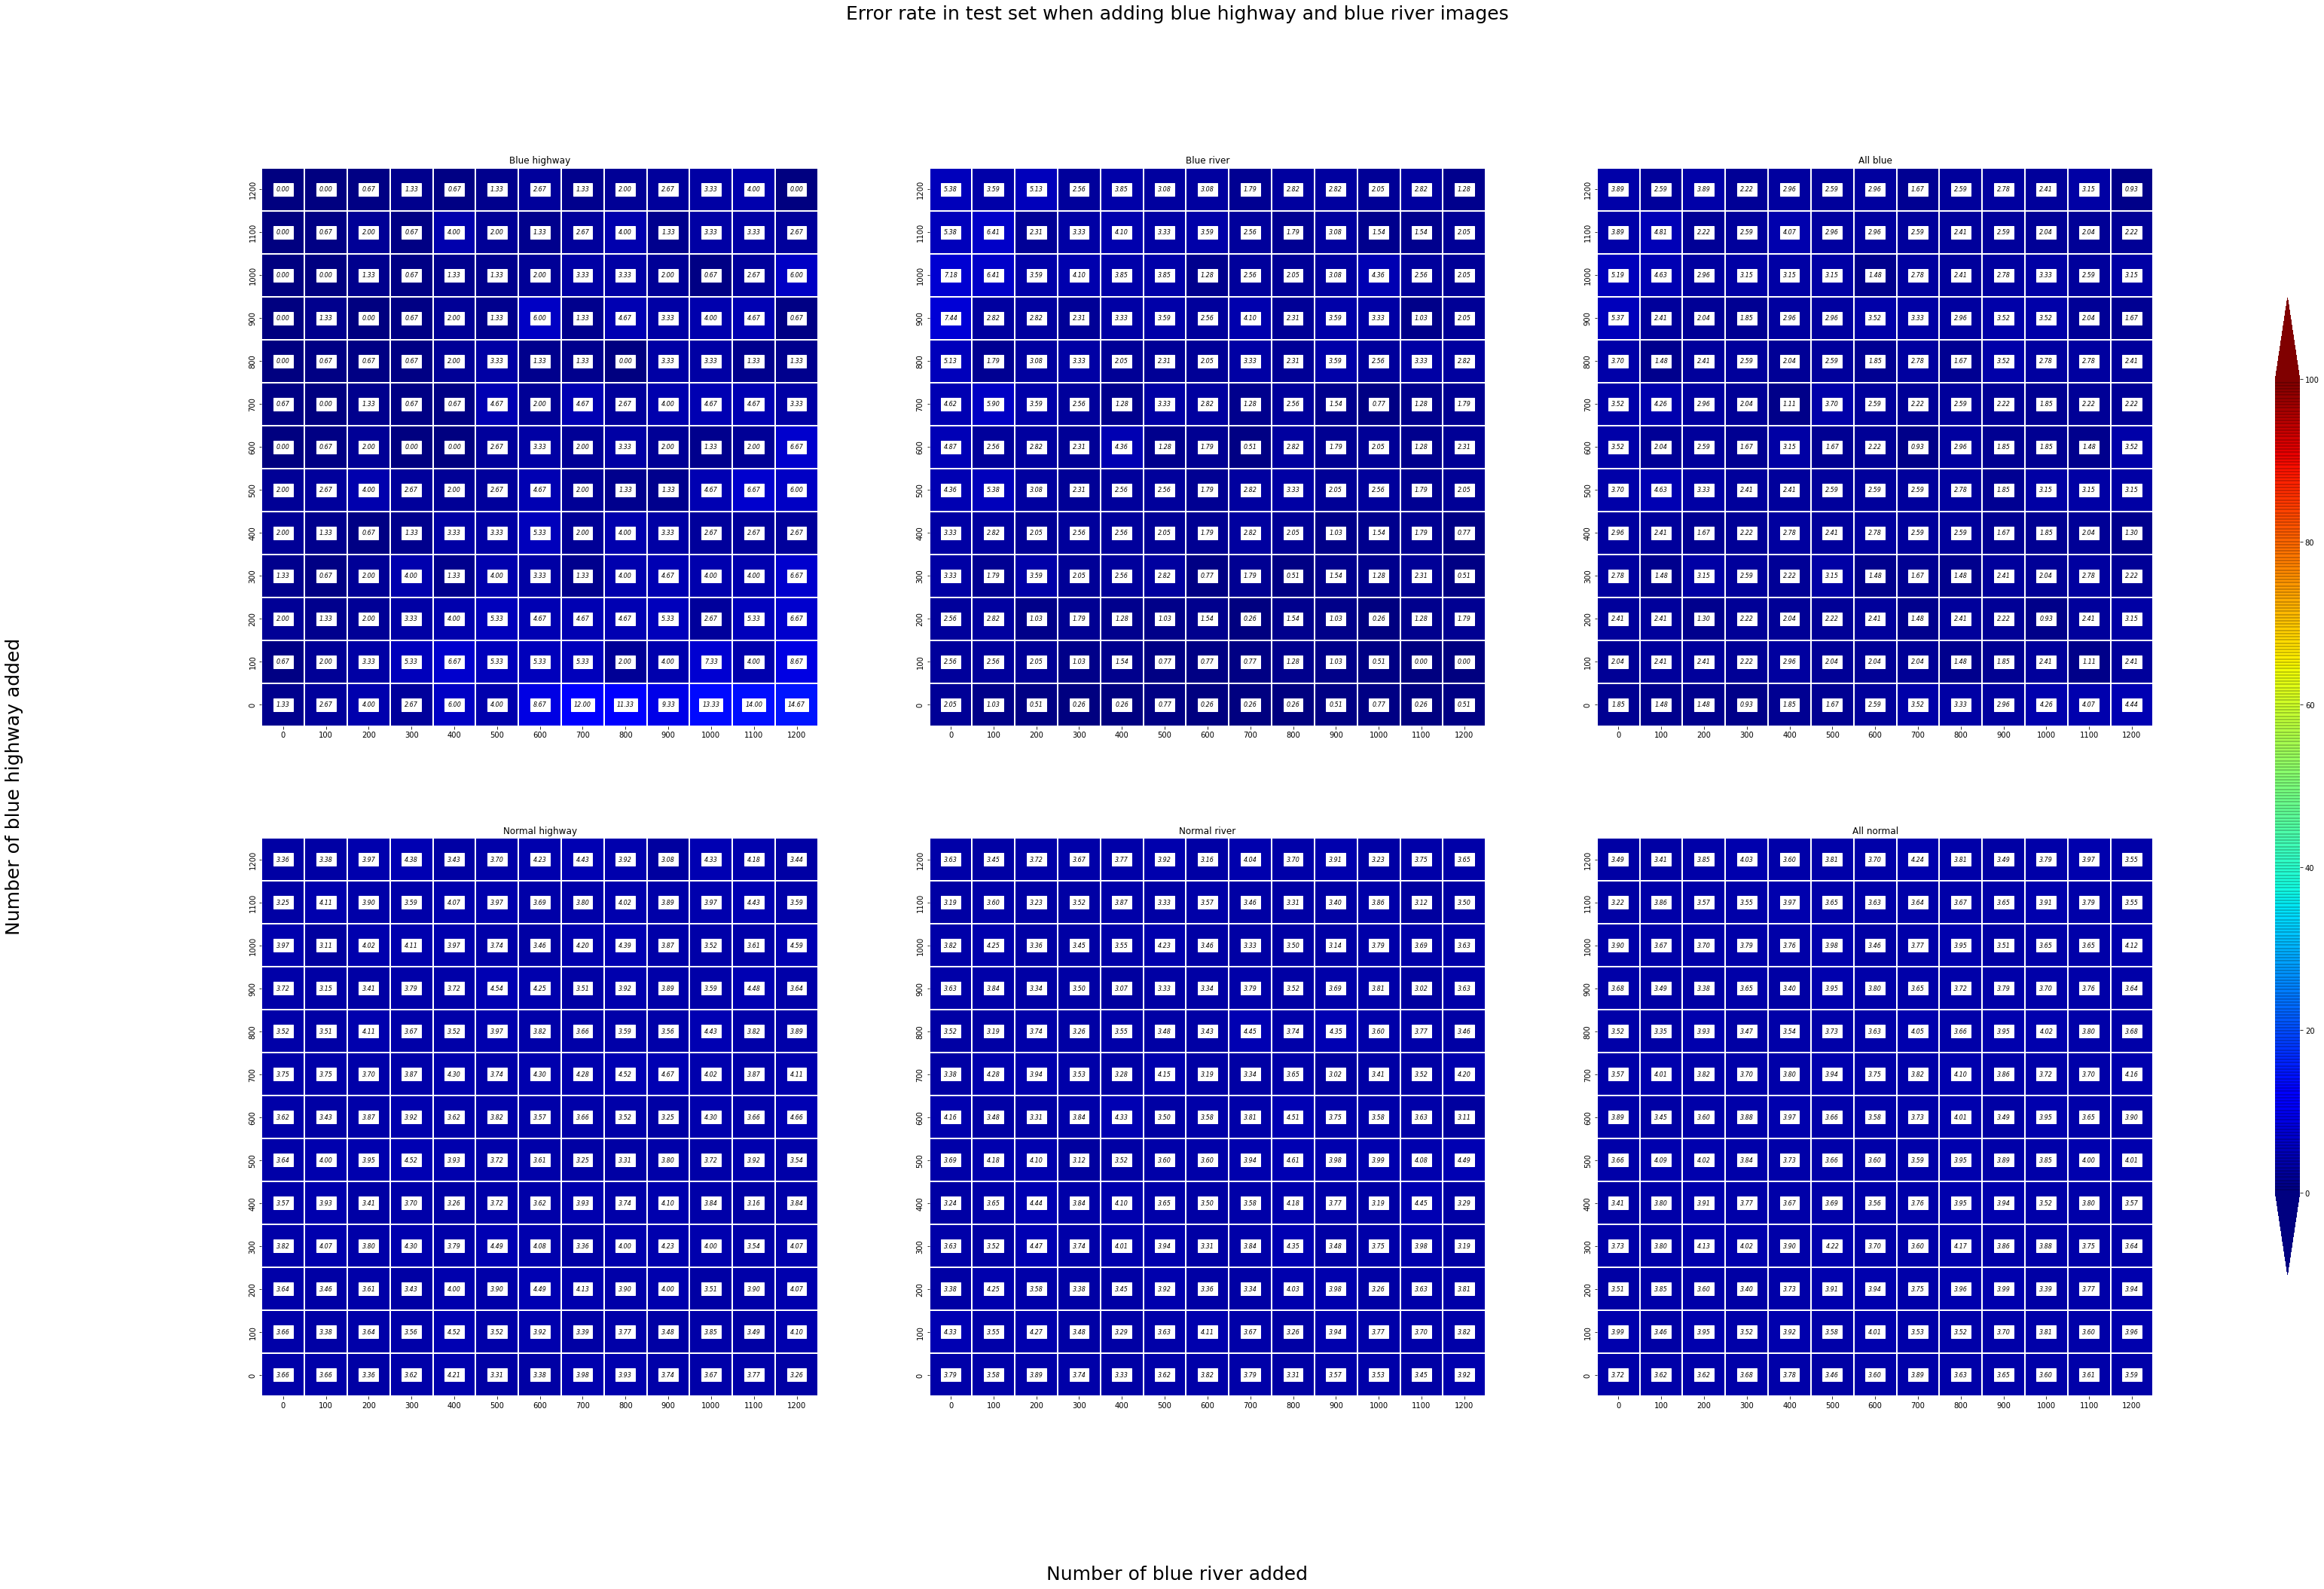

In [6]:
plot_heatmap_err_rate(error_rate, nbs_highway, nbs_river)

## Evaluations 

In [12]:
df = get_dataframe(path=save_path, model_name='Vgg16', aug_name='FDA', nb_hw=200, nb_rv=1000, nb_seeds=10)

In [13]:
df.iloc[81:100, :]

,Model name,Augmentation method,Seed,Config,Metric name,Metric value,Mapping
81,Vgg16,FDA,1,Config_2,Err_bl_rv,0.000000,"(200, 1000, CE)"
82,Vgg16,FDA,1,Config_2,Err_bl,1.851852,"(200, 1000, CE)"
83,Vgg16,FDA,1,Config_2,Err_nor,3.678930,"(200, 1000, CE)"
84,Vgg16,FDA,1,Config_2,Err_nor_hw,4.262295,"(200, 1000, CE)"
85,Vgg16,FDA,1,Config_2,Err_nor_rv,3.071672,"(200, 1000, CE)"
86,Vgg16,FDA,1,Config_2,Err_hw,4.320000,"(200, 1000, CE)"
87,Vgg16,FDA,1,Config_2,Err_rv,2.880000,"(200, 1000, CE)"
88,Vgg16,FDA,2,Config_2,Err_bl_hw,0.000000,"(200, 1000, CE)"
89,Vgg16,FDA,2,Config_2,Err_bl_rv,0.000000,"(200, 1000, CE)"
90,Vgg16,FDA,2,Config_2,Err_bl,0.000000,"(200, 1000, CE)"


In [14]:
df = get_dataframe(path=save_path, model_name='Vgg16', aug_name='Flow', nb_hw=200, nb_rv=1000, nb_seeds=10)

In [15]:
df.iloc[81:100, :]

,Model name,Augmentation method,Seed,Config,Metric name,Metric value,Mapping
81,Vgg16,Flow,1,Config_2,Err_bl_rv,0.000000,"(200, 1000, CE)"
82,Vgg16,Flow,1,Config_2,Err_bl,0.000000,"(200, 1000, CE)"
83,Vgg16,Flow,1,Config_2,Err_nor,2.842809,"(200, 1000, CE)"
84,Vgg16,Flow,1,Config_2,Err_nor_hw,3.114754,"(200, 1000, CE)"
85,Vgg16,Flow,1,Config_2,Err_nor_rv,2.559727,"(200, 1000, CE)"
86,Vgg16,Flow,1,Config_2,Err_hw,3.040000,"(200, 1000, CE)"
87,Vgg16,Flow,1,Config_2,Err_rv,2.400000,"(200, 1000, CE)"
88,Vgg16,Flow,2,Config_2,Err_bl_hw,0.000000,"(200, 1000, CE)"
89,Vgg16,Flow,2,Config_2,Err_bl_rv,2.564103,"(200, 1000, CE)"
90,Vgg16,Flow,2,Config_2,Err_bl,1.851852,"(200, 1000, CE)"


In [9]:
bl_hw = df[df['Metric name']=="Err_bl_hw"]
bl_rv = df[df['Metric name']=="Err_bl_rv"]
bl = df[df['Metric name']=="Err_bl"]
nor = df[df['Metric name']=="Err_nor"]
nor_hw = df[df['Metric name']=="Err_nor_hw"]
nor_rv = df[df['Metric name']=="Err_nor_rv"]
hw = df[df['Metric name']=="Err_hw"]
rv = df[df['Metric name']=="Err_rv"]

In [10]:
array = ["Err_bl", "Err_nor"]
bl_nor = df[df['Metric name'].isin(array)]

### Blue highway

In [16]:
fig = px.violin(bl, y='Metric value', x='Metric name', color='Mapping', box=True, height=500, width=1200)
fig.show()

### Blue river

In [12]:
fig = px.violin(bl_rv, y='Metric value', x='Metric name', color='Config', box=False, height=500, width=1200)
fig.show()

### All blue

In [13]:
fig = px.violin(bl, y='Metric value', x='Metric name', color='Config', box=False, height=500, width=1200)
fig.show()

### All normal

In [14]:
fig = px.violin(nor, y='Metric value', x='Metric name', color='Config', box=False, height=500, width=1200)
fig.show()

### Normal highway

In [15]:
fig = px.violin(nor_hw, y='Metric value', x='Metric name', color='Config', box=False, height=500, width=1200)
fig.show()

### Normal river

In [16]:
fig = px.violin(nor_rv, y='Metric value', x='Metric name', color='Config', box=False, height=500, width=1200)
fig.show()

### All highway

In [17]:
fig = px.violin(hw, y='Metric value', x='Metric name', color='Config', box=False, height=500, width=1200)
fig.show()

### All river

In [18]:
fig = px.violin(rv, y='Metric value', x='Metric name', color='Config', box=False, height=500, width=1200)
fig.show()

### Blue and normal

In [19]:
fig = px.violin(bl_nor, y='Metric value', x='Metric name', color='Config', box=False, height=500, width=1200)
fig.show()

In [20]:
fig = px.violin(bl_nor, y='Metric value', color='Metric name', x='Config', box=False, height=500, width=1200)
fig.show()